Atividade Aula 2.2

Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final de cada época. Após o treinamento, plote o valor da perda em função da época.
Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.
Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

Importação de Bibliotecas

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

Carregamento e Pré-processamento dos Dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]

In [3]:
x_train = data[:,0:1]
y_train = data[:,1:2]

Obtém o número de amostras (linhas) no conjunto de treinamento.

In [8]:
n_samples = x_train.shape[0]

Normalização dos dados

In [9]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [10]:
# permite que o modelo aprenda o termo de bias
x_train_bias = np.hstack([np.ones(shape=(n_samples, 1)), x_train])

Definição da Rede Neural

In [11]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1, 0.1, (n_out, n_in))

    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

Inicializa o modelo

In [12]:
model = Net(2, 1)

Cálculo da Perda Inicial (Sem Treinamento)

In [13]:
y_pred_initial = model.forward(x_train_bias)
loss_initial = np.square(y_pred_initial - y_train).mean()
print(f'Perda inicial (não treinada): {loss_initial:.6f}')

Perda inicial (não treinada): 0.316631


In [14]:
#Treinamento com Gradiente Descendente
num_epochs = 100
learning_rate = 0.5
losses = []

for epoch in range(num_epochs):
    y_pred = model.forward(x_train_bias)
    loss = np.square(y_pred - y_train).mean()
    losses.append(loss)

    w_grad = (2.0 / n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)
    model.w -= learning_rate * w_grad.T

    if (epoch + 1) % 10 == 0:
        print(f'Epoch[{epoch + 1}/{num_epochs}], loss: {loss:.6f}')

Epoch[10/100], loss: 0.026652
Epoch[20/100], loss: 0.023256
Epoch[30/100], loss: 0.021963
Epoch[40/100], loss: 0.021472
Epoch[50/100], loss: 0.021284
Epoch[60/100], loss: 0.021213
Epoch[70/100], loss: 0.021186
Epoch[80/100], loss: 0.021176
Epoch[90/100], loss: 0.021172
Epoch[100/100], loss: 0.021170


Plotar a Perda ao Longo das Épocas

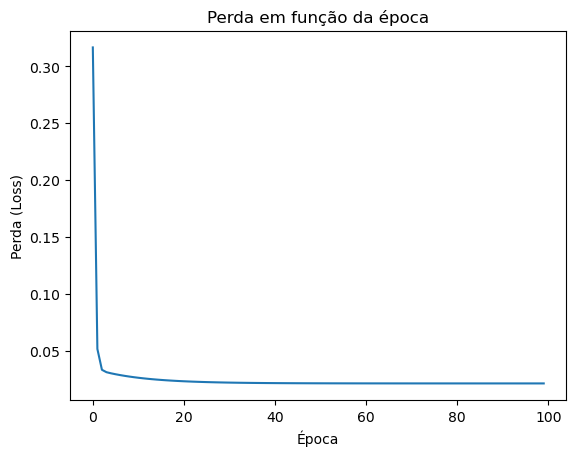

In [15]:
plt.plot(range(num_epochs), losses)
plt.xlabel('Época')
plt.ylabel('Perda (Loss)')
plt.title('Perda em função da época')
plt.show()

Cálculo da Perda Final Após Treinamento

In [16]:
y_pred_final = model.forward(x_train_bias)
loss_final = np.square(y_pred_final - y_train).mean()
print(f'Perda final após treinamento: {loss_final:.6f}')

Perda final após treinamento: 0.021170


Solução Analítica
Calcula os pesos ótimos usando a fórmula analítica e os aplica a uma nova instância da rede neural.
Calcula e imprime a perda usando a solução analítica.

In [17]:
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)

Aplicação da Solução Analítica

In [18]:
model_analytical = Net(2, 1)
model_analytical.w = w_opt.T

Cálculo da Perda com a Solução Analítica

In [19]:
y_pred_analytical = model_analytical.forward(x_train_bias)
loss_analytical = np.square(y_pred_analytical - y_train).mean()
print(f'Perda com solução analítica: {loss_analytical:.6f}')

Perda com solução analítica: 0.021169


In [20]:
print(f'Pesos após Gradiente Descendente: {model.w}')
print(f'Pesos da Solução Analítica: {model_analytical.w}')

Pesos após Gradiente Descendente: [[0.26327365 0.68273812]]
Pesos da Solução Analítica: [[0.26134159 0.68646976]]


Conclusão 
Após o treinamento com gradiente descendente, a perda final é muito semelhante à perda com a solução analítica, o que indica que o treinamento evoluiu para uma solução quase ideal.
A diferença de peso entre a solução analítica e o gradiente descendente é mínima.